In [3]:
import os


if "original_dir" in globals():
    # current_dir = os.path.dirname(original_dir)
    current_dir = original_dir
    os.chdir(current_dir)
    print(f"Current directory: {current_dir}")
else:
    original_dir = os.getcwd()
    print(f"Current directory: {original_dir}")

os.chdir("../")
print(f"Changed directory: {os.getcwd()}")

Current directory: d:\northeastern\neu_dev\neumove_org\myoassist\docs
Changed directory: d:\northeastern\neu_dev\neumove_org\myoassist


In [18]:
import numpy as np
from myoassist_rl.rl_train.utils.environment_handler import EnvironmentHandler
from myoassist_rl.envs import myoassist_leg_imitation
from myoassist_rl.rl_train.utils.config_imiatation_exo import ExoImitationTrainSessionConfig
import mediapy
import mujoco
import matplotlib.pyplot as plt

In [5]:
config = EnvironmentHandler.get_session_config_from_path("myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json", ExoImitationTrainSessionConfig)
config.env_params.env_id = "myoAssistLegImitationExo-v0"
config.env_params.model_path = "models/22muscle_2D/myoLeg22_2D_BASELINE.xml"
config.env_params.safe_height = 0.0
config.env_params.out_of_trajectory_threshold = 0.3
config.env_params.num_envs = 1

Loading config from myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json


In [6]:
ref_data_dict = EnvironmentHandler.load_reference_data(config)


Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz


In [12]:
envw = EnvironmentHandler.create_environment(config, False)
env:myoassist_leg_imitation.MyoAssistLegImitation = envw.unwrapped

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_BASELINE.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.2, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=0.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 0.2, 'knee_angle_r': 0.2, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k

In [13]:
def render():
    
    env.reset(seed=0)
    frames = []
    for step in range(60):
        # obs, reward, done, truncated, info = env.step(np.zeros(env.action_space.shape))
        obs, reward, done, truncated, info = env.step(env.action_space.sample())
        # env.imitation_step(True)
        
        frame = env.sim.renderer.render_offscreen(camera_id=1,
                                                    width=1920//4,
                                                    height=1080//4)
        frames.append(frame)
    mediapy.show_video(frames, fps=30)

In [14]:
render()

In [16]:
env.sim.renderer._scene_option.flags[mujoco.mjtVisFlag.mjVIS_CONTACTFORCE] = 1
env.sim.renderer._scene_option.flags[mujoco.mjtVisFlag.mjVIS_ACTUATOR] = 1
render()

In [30]:
observations = {
    "hip_flexion_r": [],
    "r_knee_limit_sensor": [],
    "r_toes_sensor": [],

}
frames = []
env.reset(seed=0)
for step in range(60):
    # obs, reward, done, truncated, info = env.step(np.zeros(env.action_space.shape))
    obs, reward, done, truncated, info = env.step(env.action_space.sample())
    # env.imitation_step(True)

    observations["hip_flexion_r"].append(env.sim.data.joint("hip_flexion_r").qpos[0])
    observations["r_knee_limit_sensor"].append(env.sim.data.sensor("r_knee_sensor").data[0])
    observations["r_toes_sensor"].append(env.sim.data.sensor("r_toes").data[0])

    frame = env.sim.renderer.render_offscreen(camera_id=1,
                                                width=1920//4,
                                                height=1080//4)
    frames.append(frame)
mediapy.show_video(frames, fps=30)

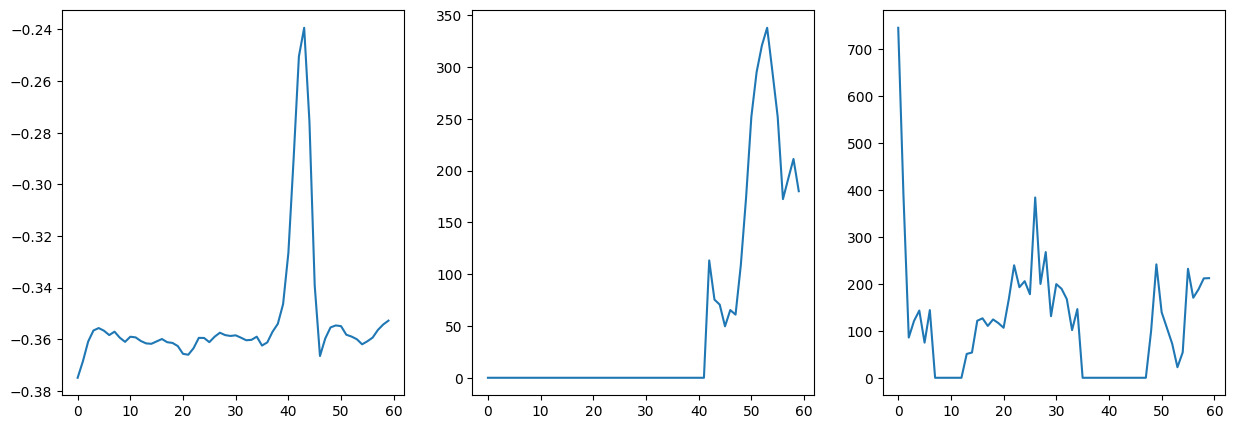

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(observations["hip_flexion_r"])
axs[1].plot(observations["r_knee_limit_sensor"])
axs[2].plot(observations["r_toes_sensor"])
plt.show()
